In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("./diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [3]:
data = df.copy()

In [4]:
cat_attr = ["GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income"]
num_attr = ["BMI"]

In [5]:
data_cat = data[cat_attr].copy()
data = data.drop(cat_attr, axis=1)

In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
data_cat = pd.DataFrame(encoder.fit_transform(data_cat).toarray())

In [7]:
data = pd.concat([data_cat, data], axis=1)

In [8]:
data

,0,1,2,3,4,5,6,7,8,9,...,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
70688,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
70689,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
70690,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [9]:
y = data[["Diabetes_binary"]].copy()
X = data.drop(["Diabetes_binary"], axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train_t, X_test, y_train_t, y_test = train_test_split(X, y,
                                                        test_size=0.15,
                                                        random_state=27,
                                                        stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                test_size=0.15,
                                                random_state=27,
                                                stratify=y)

In [11]:
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_train[["BMI"]] = pd.DataFrame(scalar.fit_transform(X_train[["BMI"]]), columns=["BMI"])
X_val[["BMI"]] = pd.DataFrame(scalar.transform(X_val[["BMI"]]), columns=["BMI"])
X_test[["BMI"]] = pd.DataFrame(scalar.transform(X_test[["BMI"]]), columns=["BMI"])

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-11-29 17:56:41.315061: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-29 17:56:41.315200: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


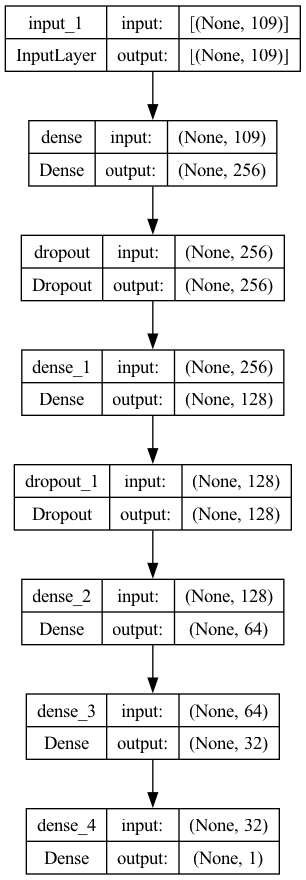

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss='binary_crossentropy',
              metrics='accuracy')

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val), callbacks=[callback])
model.save("model.h5")

Epoch 1/50


2023-11-29 17:57:08.290809: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-11-29 17:57:08.511316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be

   1/1878 [..............................] - ETA: 19:40 - loss: 0.6901 - accuracy: 0.4375

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

1878/1878 [==============================] - ETA: 0s - loss: 0.5338 - accuracy: 0.7336

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x24x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x24x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

1878/1878 [==============================] - 21s 11ms/step - loss: 0.5338 - accuracy: 0.7336 - val_loss: 0.5034 - val_accuracy: 0.7499
Epoch 2/50
  11/1878 [..............................] - ETA: 20s - loss: 0.5290 - accuracy: 0.7386

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x12x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/495c257e-668e-11ee-93ce-926038f30c31/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x12x1x1xi1>'


1878/1878 [==============================] - 21s 11ms/step - loss: 0.5113 - accuracy: 0.7483 - val_loss: 0.5057 - val_accuracy: 0.7517
Epoch 3/50
1878/1878 [==============================] - 21s 11ms/step - loss: 0.5075 - accuracy: 0.7499 - val_loss: 0.5057 - val_accuracy: 0.7535
Epoch 4/50
1878/1878 [==============================] - 19s 10ms/step - loss: 0.5061 - accuracy: 0.7516 - val_loss: 0.5043 - val_accuracy: 0.7541
Epoch 5/50
1878/1878 [==============================] - 20s 11ms/step - loss: 0.5027 - accuracy: 0.7522 - val_loss: 0.5013 - val_accuracy: 0.7546
Epoch 6/50
1878/1878 [==============================] - 19s 10ms/step - loss: 0.5020 - accuracy: 0.7537 - val_loss: 0.5010 - val_accuracy: 0.7559
Epoch 7/50
1878/1878 [==============================] - 19s 10ms/step - loss: 0.5005 - accuracy: 0.7541 - val_loss: 0.5005 - val_accuracy: 0.7551
Epoch 8/50
1878/1878 [==============================] - 19s 10ms/step - loss: 0.4991 - accuracy: 0.7557 - val_loss: 0.5014 - val_accura

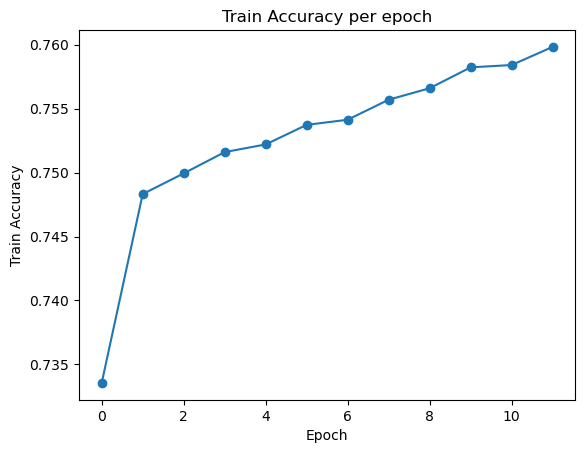

In [27]:
plt.plot(history.history["accuracy"])
plt.scatter(range(len(history.history["accuracy"])), history.history["accuracy"])
plt.title("Train Accuracy per epoch")
plt.ylabel("Train Accuracy")
plt.xlabel("Epoch")
plt.show()

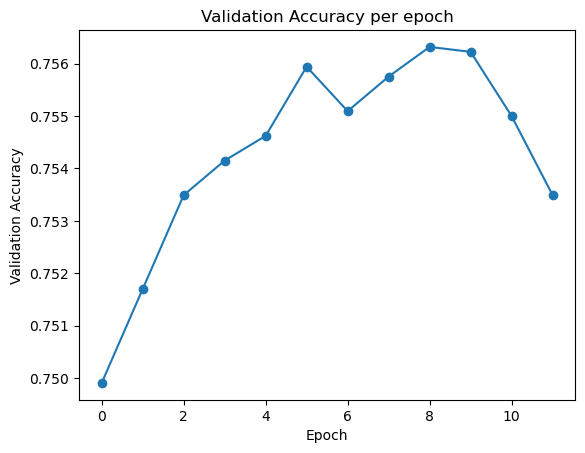

In [28]:
plt.plot(history.history["val_accuracy"])
plt.scatter(range(len(history.history["val_accuracy"])), history.history["val_accuracy"])
plt.title("Validation Accuracy per epoch")
plt.ylabel("Validation Accuracy")
plt.xlabel("Epoch")
plt.show()

In [29]:
model.evaluate(X_test, y_test)

332/332 [==============================] - 2s 6ms/step - loss: 0.5012 - accuracy: 0.7535


[0.50124591588974, 0.7534892559051514]

In [30]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(X_test)
precision_recall_fscore_support(y_test, y_pred > 0.5)

332/332 [==============================] - 1s 2ms/step


(array([0.77757125, 0.73325234]),
 array([0.71010939, 0.79686911]),
 array([0.74231073, 0.76373825]),
 array([5302, 5302]))